<a href="https://colab.research.google.com/github/cuzmyk/data_mining/blob/main/pr3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №5. Библиотека Pandas. Визуальный анализ данных

## Комплексное задание №1. Применение основных методов для анализа данных

1. Скачайте этот блокнот к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

#### Полезная литература
- [**Блокнот с теорией**](https://colab.research.google.com/drive/1SLqmaYz4xEsxVV-LGwb3ityheBTzHJQu?usp=sharing)
- http://pandas.pydata.org/pandas-docs/stable/10min.html
- https://pandas.pydata.org/pandas-docs/stable/indexing.html
- https://pandas.pydata.org/pandas-docs/stable/missing_data.html

В этом задании мы с Вами рассмотрим датасет [Adult Data Set](https://archive.ics.uci.edu/ml/datasets/Adult).
Основывается он на данных переписи населения 1994 года в США.

Расшифровка содержимого колонок:

- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous. sampling weight, more here: SIPP Weighting.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous. Income from investment sources, apart from wages/salary.
- capital-loss: continuous. Losses from investment sources, apart from wages/salary.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [27]:
%matplotlib inline
import pandas as pd
pd.__version__

'2.1.4'

Если вы увидели warning, не переживайте, всё хорошо.
- https://stackoverflow.com/questions/40845304/runtimewarning-numpy-dtype-size-changed-may-indicate-binary-incompatibility
- https://github.com/numpy/numpy/pull/432

In [28]:
columns='age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income'.split(',')
# df = pd.read_csv('../../data/adult.csv.gz', na_values='?') # можно загрузить из файла или URL
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', na_values=' ?', names=columns)
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


1) Выведите последние 10 элеметнов датасета

In [29]:
df.tail(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
32551,32,Private,34066,10th,6,Married-civ-spouse,Handlers-cleaners,Husband,Amer-Indian-Eskimo,Male,0,0,40,United-States,<=50K
32552,43,Private,84661,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,0,0,45,United-States,<=50K
32553,32,Private,116138,Masters,14,Never-married,Tech-support,Not-in-family,Asian-Pac-Islander,Male,0,0,11,Taiwan,<=50K
32554,53,Private,321865,Masters,14,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K
32555,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


2) Сколько колонок и сколько строк в этом датасете?

In [30]:
num_rows, num_columns = df.shape
print(f"Количество строк: {num_rows}")
print(f"Количество столбцов: {num_columns}")

Количество строк: 32561
Количество столбцов: 15


3) Какие типы данных у элементов этого датасета?

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


4) Какие признаки имеют пропуски?

In [32]:
df.isnull().sum()

,0
age,0
workclass,1836
fnlwgt,0
education,0
education.num,0
marital.status,0
occupation,1843
relationship,0
race,0
sex,0


5) Как вы думаете, с чем связаны пропуски этих значение. Напишите развернутый ответ в ячейке ниже.

Ваш ответ:
- Рабочий класс: не захотели разглашать свой рабочий класс
- Профессия: не захотели разглашать свой род занятий
- Родная страна: эмигранты не захотели чтобы их нашли

6) Какие и сколько различных рабочих классов workclass представлено в выборке?

In [33]:
workclass_counts = df['workclass'].value_counts()
print("Количество каждого рабочего класса:")
print(workclass_counts)

Количество каждого рабочего класса:
workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64


7) Какой средний возраст женщин и мужчин?

In [34]:
average_age_by_sex = df.groupby('sex')['age'].mean()

print("Средний возраст женщин и мужчин:")
print(average_age_by_sex)

Средний возраст женщин и мужчин:
sex
 Female    36.858230
 Male      39.433547
Name: age, dtype: float64


8) Постройте гистограмму(bar) распределения образования людей (education)

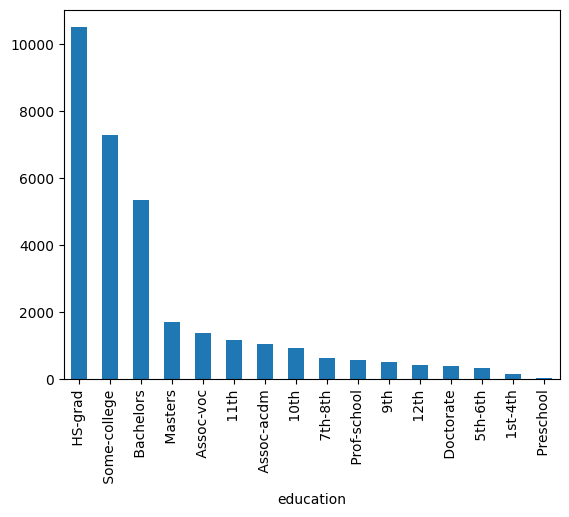

In [35]:
education = df['education'].value_counts().plot(kind='bar')

9) Каковы средние значения и среднеквадратичные отклонения возраста тех, кто получает более 50K в год (признак income) и тех, кто получает менее 50K в год?

In [36]:
income_stats = df.groupby('income')['age'].agg(['mean', 'std'])

print("Средние значения и среднеквадратичные отклонения возраста:")
print(income_stats)

Средние значения и среднеквадратичные отклонения возраста:
             mean        std
income                      
 <=50K  36.783738  14.020088
 >50K   44.249841  10.519028


10) Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? (признак education - Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters или Doctorate)

In [37]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [38]:
# Определяем высшее образование
higher_education = [' Bachelors', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', ' Masters', ' Doctorate']

high_income_high_educ = df[(df['income'] == ' >50K') & (df['education'].isin(higher_education))]['education'].value_counts().sum()
high_income_low_educ = df[(df['income'] == ' >50K') & (~df['education'].isin(higher_education))]['education'].value_counts().sum()

print('Количество людей получающих >50k с высшим образованием:', high_income_high_educ)
print('Количество людей получающих >50k без высшего образования:', high_income_low_educ)
print('Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? Ответ:', 'Да' if high_income_low_educ == 0 else 'Нет')

Количество людей получающих >50k с высшим образованием: 4535
Количество людей получающих >50k без высшего образования: 3306
Правда ли, что люди, которые получают больше 50k, имеют как минимум высшее образование? Ответ: Нет


11) Среди кого больше доля зарабатывающих много (>50K): среди женатых или холостых мужчин (признак marital-status)? Женатыми считаем тех, у кого marital-status начинается с Married (Married-civ-spouse, Married-spouse-absent или Married-AF-spouse), остальных считаем холостыми.

In [39]:
married_statuses = [' Married-civ-spouse', ' Married-spouse-absent', ' Married-AF-spouse']

df_men = df[df['sex'] == ' Male']

married = df_men[df_men['marital.status'].isin(married_statuses)].value_counts().sum()
married_high_income = df_men[(df_men['income'] == ' >50K') & (df_men['marital.status'].isin(married_statuses))].value_counts().sum()

bachelor = df_men[~df_men['marital.status'].isin(married_statuses)].value_counts().sum()
bachelor_high_income = df_men[(df_men['income'] == ' >50K') & (~df_men['marital.status'].isin(married_statuses))].value_counts().sum()

print("Доля зарабатывающих >50K среди женатых:", married_high_income / married)
print("Доля зарабатывающих >50K среди холостых:", bachelor_high_income / bachelor)
print("Доля зарабатывающих >50K больше", 'среди женатых' if married_high_income / married > bachelor_high_income / bachelor else 'среди холостых')


Доля зарабатывающих >50K среди женатых: 0.4479843444227006
Доля зарабатывающих >50K среди холостых: 0.08849441157133466
Доля зарабатывающих >50K больше среди женатых


12) Постройте [сводную таблицу](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) для отображения зависимостей среднего времени работы (hours.per.week) с доходом (income) для каждой страны (native.country).  


> Пример фрагмента таблицы:



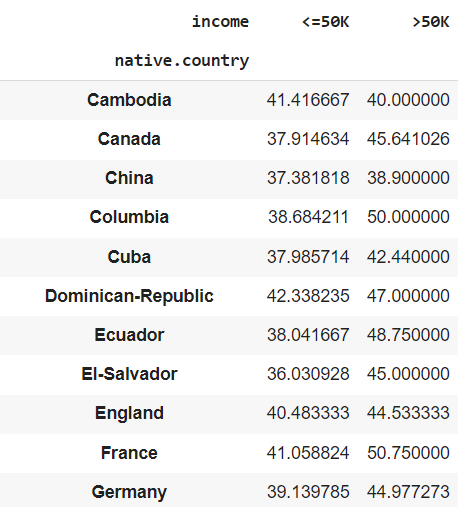

In [40]:
pivot_table = pd.pivot_table(df, values='hours.per.week', index='native.country', columns='income', aggfunc='mean')

print(pivot_table)

income                           <=50K       >50K
native.country                                   
 Cambodia                    41.416667  40.000000
 Canada                      37.914634  45.641026
 China                       37.381818  38.900000
 Columbia                    38.684211  50.000000
 Cuba                        37.985714  42.440000
 Dominican-Republic          42.338235  47.000000
 Ecuador                     38.041667  48.750000
 El-Salvador                 36.030928  45.000000
 England                     40.483333  44.533333
 France                      41.058824  50.750000
 Germany                     39.139785  44.977273
 Greece                      41.809524  50.625000
 Guatemala                   39.360656  36.666667
 Haiti                       36.325000  42.750000
 Holand-Netherlands          40.000000        NaN
 Honduras                    34.333333  60.000000
 Hong                        39.142857  45.000000
 Hungary                     31.300000  50.000000


13) Постройте сводную таблицу для сравнения уровня образования и разности между capital.gain и capital.loss по следующему алгоритму:&nbsp;  
1. Создайте вспомогательную таблицу (датафрейм) и добавьте в неё столбец "education" из целевой таблицы
2. Добавьте во вспомогательную таблицу ещё один столбец "capital.diff", значиниями которого будут являться разности столбцов capital.gain и capital.loss целевой таблицы
3. Удалите во вспомогательной таблице все строки, в которых значение столбца "capital.diff" равно нулю  
&nbsp; Подсказка:
```
summary_table = summary_table[summary_table['capital.diff'] != 0 ]
```
4. Для набора значений из столбца "capital.diff", необходимо сформировать 10 категорий (кластеров), это можно сделать с помощью математических функций, типа log, извлечение корня N-ой степени и округления, для последующего перехода к категориальным признакам.  
  * В нашем случае, можно воспользоваться методом [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html) и равномерно разделить наш набор данных на целевое количество категорий
5. Добавьте во вспомогательную таблицу столбец "categories", и проинициализируйте его значениями категорий, которые возвращает метод pd.qcut()  
&nbsp; Пример:
```
summary_table['categories'] = pd.qcut(summary_table["capital.diff"], q = 10)

6. Постройте сводную таблицу с помощью метода pivot_table(),

Примерная структура таблицы (в качестве значений выводится количество людей, относящихся к той или иной группе):

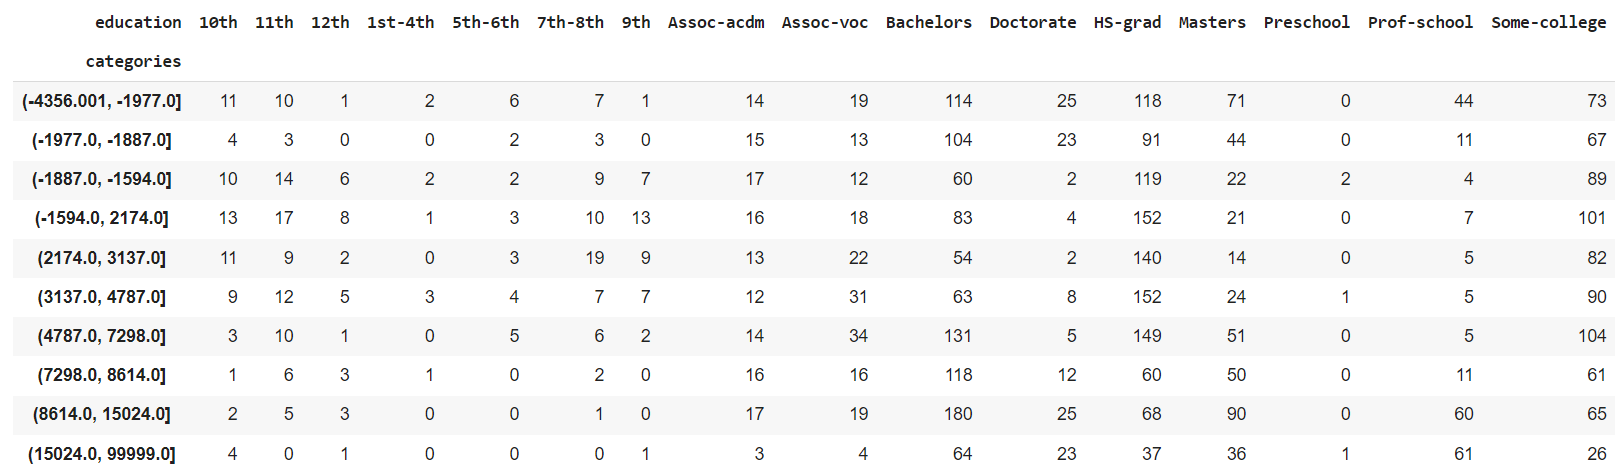

In [76]:
# Создаем вспомогательную таблицу и добавляем столбец "education"
summary_table = df[['education']].copy()

# Добавляем столбец "capital.diff"
summary_table['capital.diff'] = df['capital.gain'] - df['capital.loss']

# Удаляем строки, где "capital.diff" равно нулю
summary_table = summary_table[summary_table['capital.diff'] != 0]

# Разделяем "capital.diff" на 10 категорий с помощью pd.qcut()
summary_table['categories'] = pd.qcut(summary_table['capital.diff'], q=10)

pivot_table = pd.pivot_table(summary_table, values='capital.diff', index='education', columns='categories', aggfunc='count')

print("Сводная таблица сравнения уровня образования и разности между capital.gain и capital.loss:")
pivot_table

Сводная таблица сравнения уровня образования и разности между capital.gain и capital.loss:


categories,"(-4356.001, -1977.0]","(-1977.0, -1887.0]","(-1887.0, -1594.0]","(-1594.0, 2174.0]","(2174.0, 3137.0]","(3137.0, 4787.0]","(4787.0, 7298.0]","(7298.0, 8614.0]","(8614.0, 15024.0]","(15024.0, 99999.0]"
education,,,,,,,,,,
10th,11,4,10,13,11,9,3,1,2,4
11th,10,3,14,17,9,12,10,6,5,0
12th,1,0,6,8,2,5,1,3,3,1
1st-4th,2,0,2,1,0,3,0,1,0,0
5th-6th,6,2,2,3,3,4,5,0,0,0
7th-8th,7,3,9,10,19,7,6,2,1,0
9th,1,0,7,13,9,7,2,0,0,1
Assoc-acdm,14,15,17,16,13,12,14,16,17,3
Assoc-voc,19,13,12,18,22,31,34,16,19,4


14) Женщины из каких стран получают в среднем большую зарплату (>50K) чаще.

In [75]:
df_women = df[df['sex'] == ' Female']

income_by_country = df_women.groupby('native.country')['income'].apply(lambda x: (x == ' >50K').mean())

income_by_country_sorted = income_by_country.sort_values(ascending=False)

# income_by_country_sorted

print("Страны, где женщины получают в среднем большую зарплату (>50K) чаще:")
income_by_country_sorted.head()

Страны, где женщины получают в среднем большую зарплату (>50K) чаще:


,income
native.country,
Yugoslavia,0.333333
Taiwan,0.266667
Japan,0.250000
France,0.250000
Iran,0.250000


15) Создайте случайную колонку - magic_salary, которую нужно будет вычислить следующим образом: если зарплата небольшая (<50K), тогда случайно выберите число из диапазона [0,50]. Если зарплата выше 50K тогда из диапазона [51, 200]. Посчитайте среднюю зарплату в час для групп людей с одни уровнем образования на основе нашей случайной колонки magic_salary

In [43]:
import numpy as np

df['magic_salary'] = df.apply(lambda row: np.random.randint(0, 50) if row['income'] == ' <=50K' else np.random.randint(51, 200), axis=1)

average_hourly_salary_by_education = df.groupby('education')['magic_salary'].mean()

print("Средняя зарплата в час для каждого уровня образования:")
print(average_hourly_salary_by_education)

Средняя зарплата в час для каждого уровня образования:
education
 10th            32.069668
 11th            30.035745
 12th            31.517321
 1st-4th         28.035714
 5th-6th         29.474474
 7th-8th         31.849845
 9th             29.838521
 Assoc-acdm      49.835052
 Assoc-voc       50.311143
 Bachelors       66.409337
 Doctorate       99.094431
 HS-grad         40.492905
 Masters         80.746953
 Preschool       26.862745
 Prof-school     98.822917
 Some-college    43.762995
Name: magic_salary, dtype: float64


## Комплексное задание №2. Визуальный анализ данных. Часть 1

In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

В этом задании Вам предлагается провести визуальный анализ датасета о прокатах велосипедов https://www.kaggle.com/c/bike-sharing-demand/data. Оригинальная задача предполагает построение модели предсказания количества прокатов в городе в зависимости от погоды.

Для каждого дня проката известны следующие признаки (как они были указаны в источнике данных):
- season: 1 - весна, 2 - лето, 3 - осень, 4 - зима
- yr: 0 - 2011, 1 - 2012
- mnth: от 1 до 12
- holiday: 0 - нет праздника, 1 - есть праздник
- weekday: от 0 до 6
- workingday: 0 - нерабочий день, 1 - рабочий день
- weathersit: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман)
- temp: температура в Цельсиях
- atemp: температура по ощущениям в Цельсиях
- hum: влажность
- windspeed(mph): скорость ветра в милях в час
- windspeed(ms): скорость ветра в метрах в секунду
- cnt: количество арендованных велосипедов (это целевой признак, его мы будем предсказывать)

Загрузите самостоятельно(!), с помощью pandas файл `bikes_rent.csv.gz` и выведите первые 5 строк. Ознакомьтесь с данными с помощью функций describe и info.

In [45]:
df_rents = pd.read_csv('bikes_rent.csv')

df_rents.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [46]:
df_rents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


Давайте посмотрим на графиках, как целевой признак зависит количество прокатов (cnt) зависит от остальных признаков `df.columns[:-1]`.

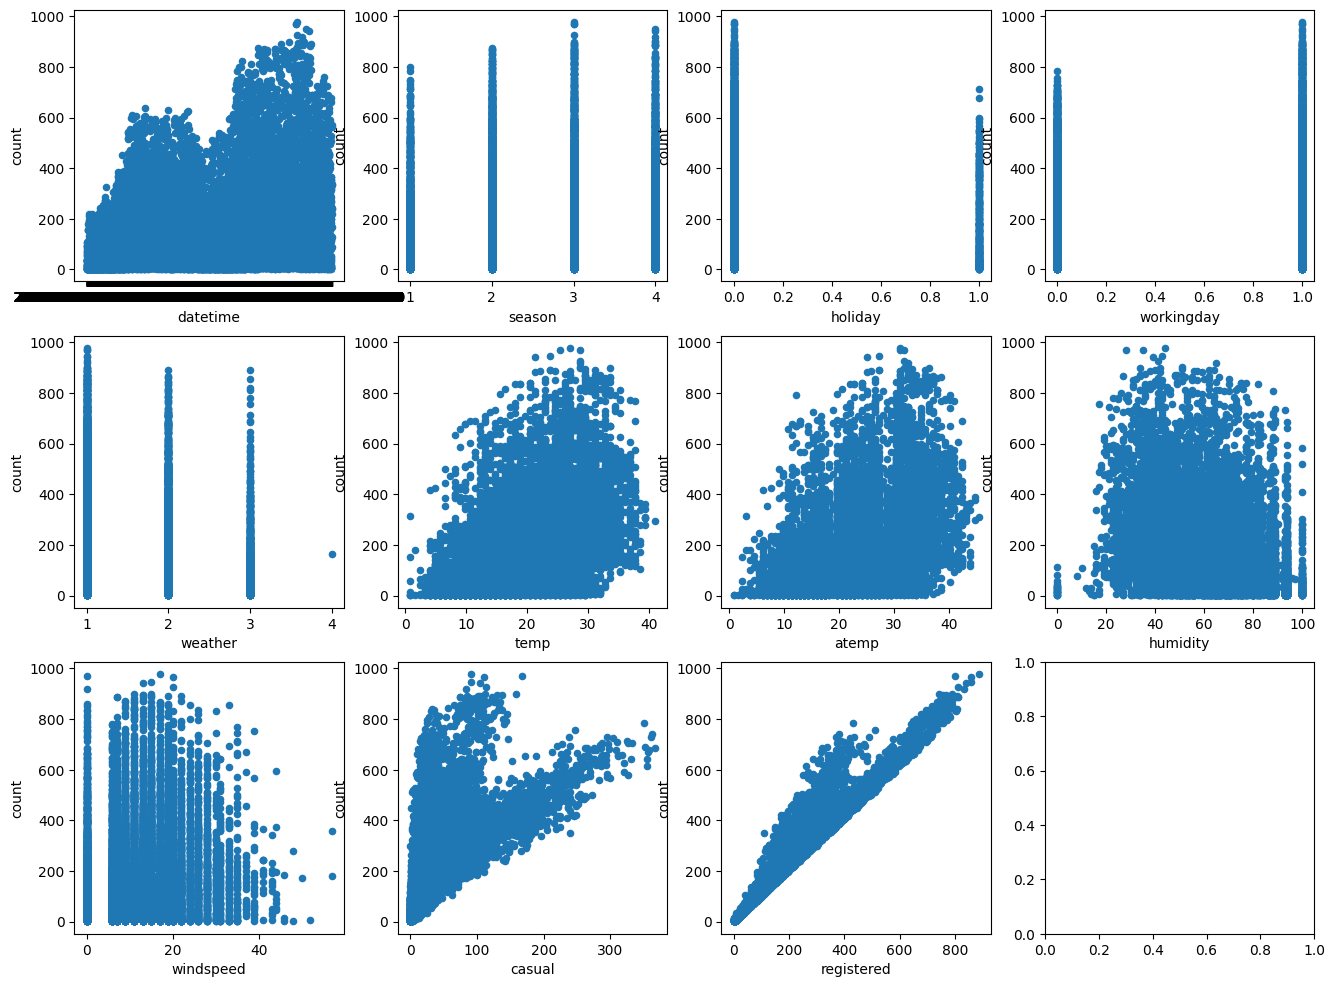

In [47]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 12))
for idx, feature in enumerate(df_rents.columns[:-1]):
     df_rents.plot(feature, "count", subplots=True, kind="scatter", ax=axes[idx // 4, idx % 4])

### 1. Ответьте на вопросы:

#### Каков характер зависимости числа прокатов от месяца?





ответ: Чем тепелее тем больше прокатов

#### Укажите один или два признака, от которых число прокатов скорее всего зависит линейно
_(чем больше значение, тем больше прокатов или наоборот, например)_

Можете проверить результат с помощью lnplot.



<Figure size 1000x600 with 0 Axes>

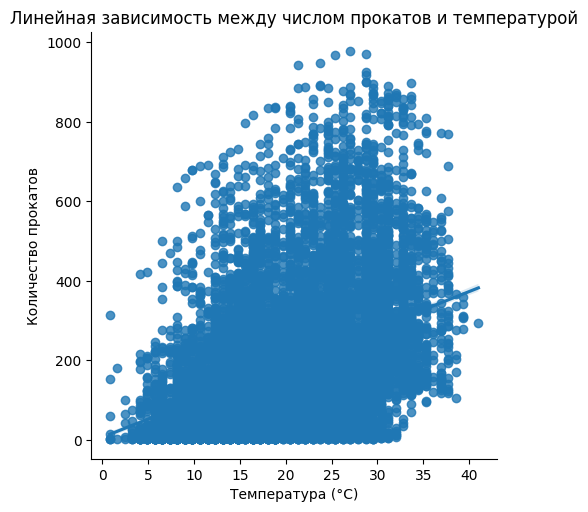

<Figure size 1000x600 with 0 Axes>

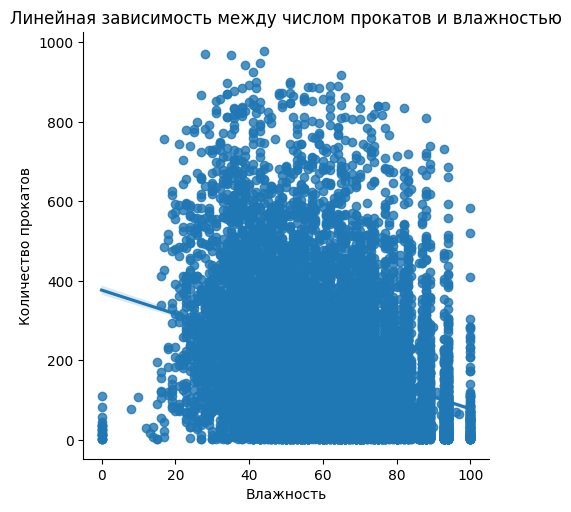

<Figure size 1000x600 with 0 Axes>

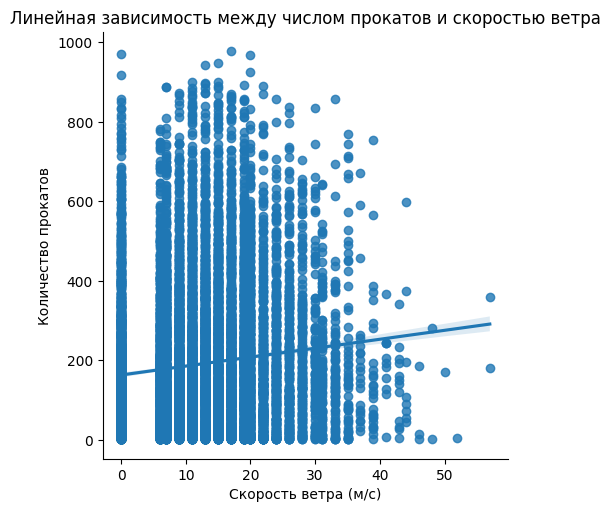

In [48]:
# Визуализация линейной зависимости между числом прокатов и температурой
plt.figure(figsize=(10, 6))
sns.lmplot(x='temp', y='count', data=df_rents)
plt.title('Линейная зависимость между числом прокатов и температурой')
plt.xlabel('Температура (°C)')
plt.ylabel('Количество прокатов')
plt.show()

# Визуализация линейной зависимости между числом прокатов и влажностью
plt.figure(figsize=(10, 6))
sns.lmplot(x='humidity', y='count', data=df_rents)
plt.title('Линейная зависимость между числом прокатов и влажностью')
plt.xlabel('Влажность')
plt.ylabel('Количество прокатов')
plt.show()

# Визуализация линейной зависимости между числом прокатов и скоростью ветра
plt.figure(figsize=(10, 6))
sns.lmplot(x='windspeed', y='count', data=df_rents)
plt.title('Линейная зависимость между числом прокатов и скоростью ветра')
plt.xlabel('Скорость ветра (м/с)')
plt.ylabel('Количество прокатов')
plt.show()

Ответ: Температура и скорость ветра

### 2. Корреляционная матрица

Напомним, что корреляция отражает взаимосвязь двух случайных величин. Она бывает положительная и отрицательная. Чем ближе коэффициент корреляции к нулю, тем меньше взаимосвязь. Чем больше абсолютная корреляци, тем взаимосвязь больше.

Постройте heatmap корреляционной матрицы. Матрица формируется средствами pandas, со стандартным значением параметров.



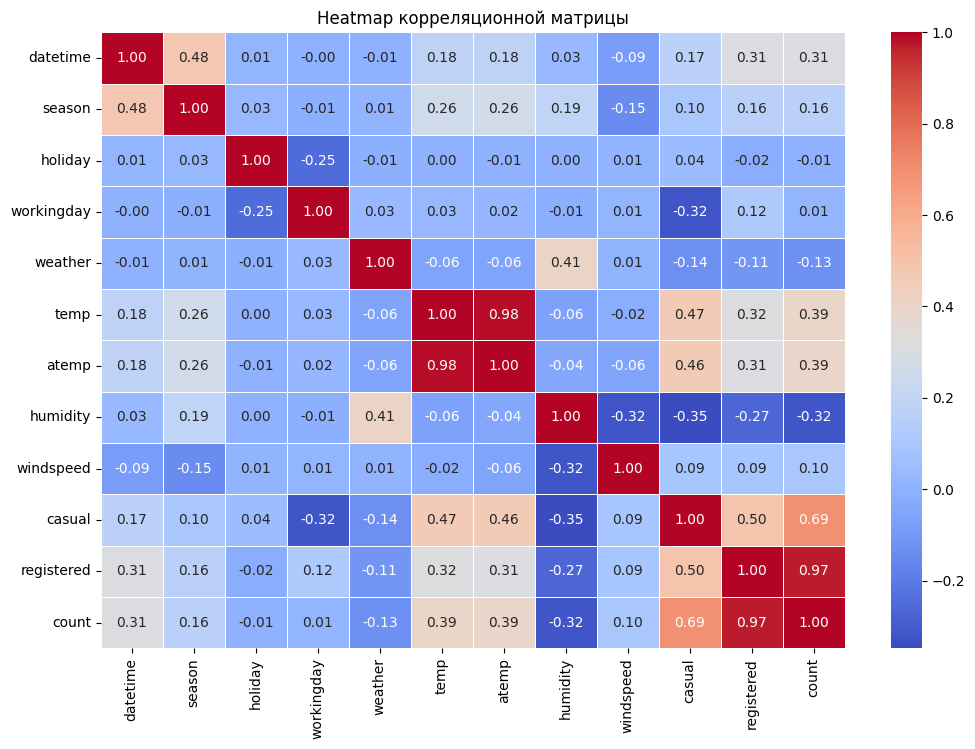

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

df_rents['datetime'] = pd.to_datetime(df_rents['datetime'])

corr_matrix = df_rents.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap корреляционной матрицы')
plt.show()

**Ответьте на вопрос**: с какими признаками количество прокатов коррелирует меньше всего (около 4 штуки). А с какими больше всего?

Ответ:
- меньше всего: рабочний день или нет, праздник или нет, скорость ветра, погода
- больше всего: температура, влажность

### 3. Barpot

Постройте Bar-график суммарного количества прокатов велосипедов по месяцам за каждый год одновременно. (будет 24 столбика)



<Figure size 1400x800 with 0 Axes>

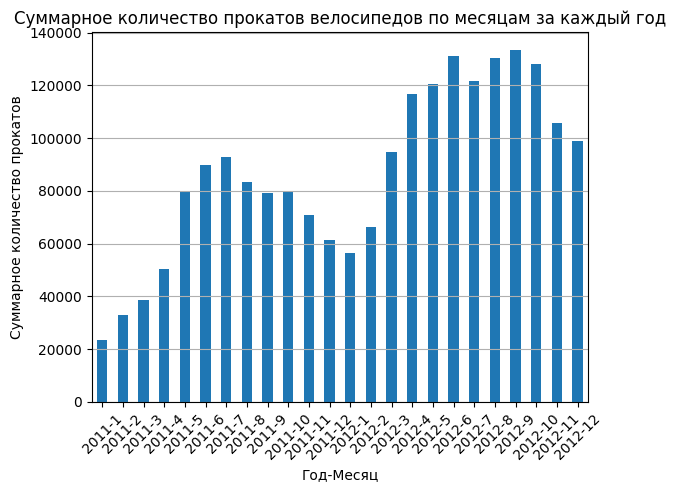

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

df_rents['year'] = df_rents['datetime'].dt.year
df_rents['month'] = df_rents['datetime'].dt.month

monthly_rentals = df_rents.groupby(['year', 'month'])['count'].sum().reset_index()

monthly_rentals['year_month'] = monthly_rentals['year'].astype(str) + '-' + monthly_rentals['month'].astype(str)

plt.figure(figsize=(14, 8))
monthly_rentals.plot(x='year_month', y='count', kind='bar', legend=False)

plt.title('Суммарное количество прокатов велосипедов по месяцам за каждый год')
plt.xlabel('Год-Месяц')
plt.ylabel('Суммарное количество прокатов')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

**Ответьте на вопрос:** почему в предыдущем графике была такая большая корреляция между количеством прокатов и годом?

Ответ: в 2012 популярность аренды велосипеда выросла, у людей не было денег на машину, решили бороться за экологию велосипедом

### 4. Countplot

Постройте countplot диаграммы для признаков `weekday`, `weathersit`,



<ipython-input-52-360a4f572f62>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weekday', data=df_rents, palette='viridis')


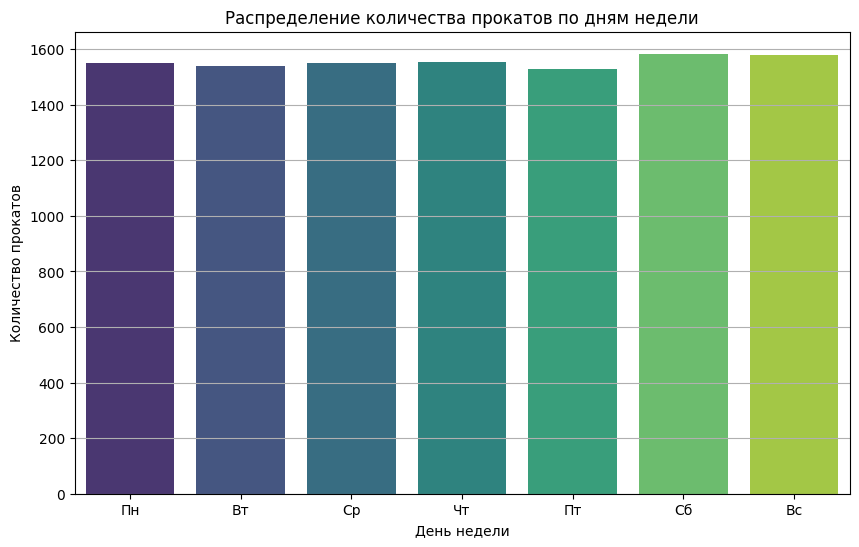

<ipython-input-52-360a4f572f62>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='weather', data=df_rents, palette='coolwarm')


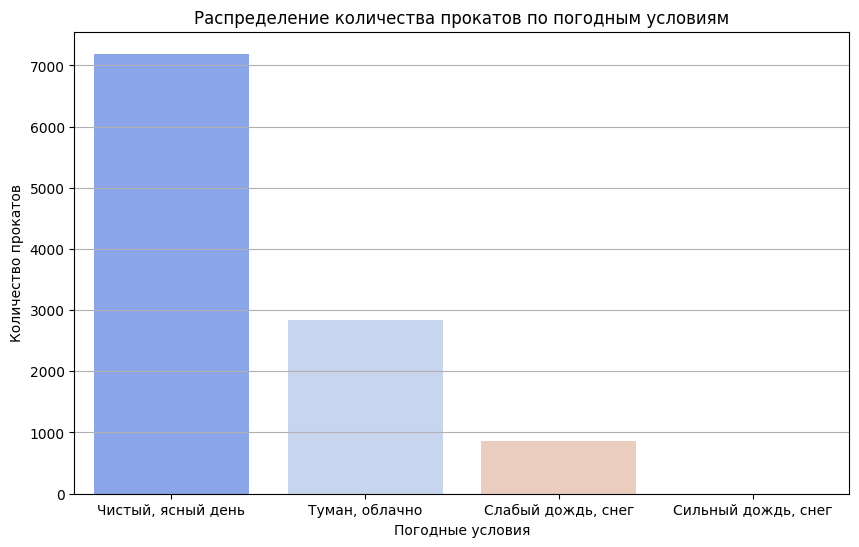

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

df_rents['datetime'] = pd.to_datetime(df_rents['datetime'])

df_rents['weekday'] = df_rents['datetime'].dt.weekday

# Построение countplot для признака 'weekday'
plt.figure(figsize=(10, 6))
sns.countplot(x='weekday', data=df_rents, palette='viridis')
plt.title('Распределение количества прокатов по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество прокатов')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], labels=['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.grid(axis='y')
plt.show()

# Построение countplot для признака 'weather'
plt.figure(figsize=(10, 6))
sns.countplot(x='weather', data=df_rents, palette='coolwarm')
plt.title('Распределение количества прокатов по погодным условиям')
plt.xlabel('Погодные условия')
plt.ylabel('Количество прокатов')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Чистый, ясный день', 'Туман, облачно', 'Слабый дождь, снег', 'Сильный дождь, снег'])
plt.grid(axis='y')
plt.show()

**Ответьте на вопрос:** что вы можете сказать о том, как формировался этот датасет.



Ответ: чем хуже погода тем меньше прокатов, от дня недели не зависит

**Ответьте на вопрос:** как называется распределение значений признака `weekday`?


    
Ответ:дискретное равномерное распределение

### 5. Распределение

Постройте распределение целевого признака.


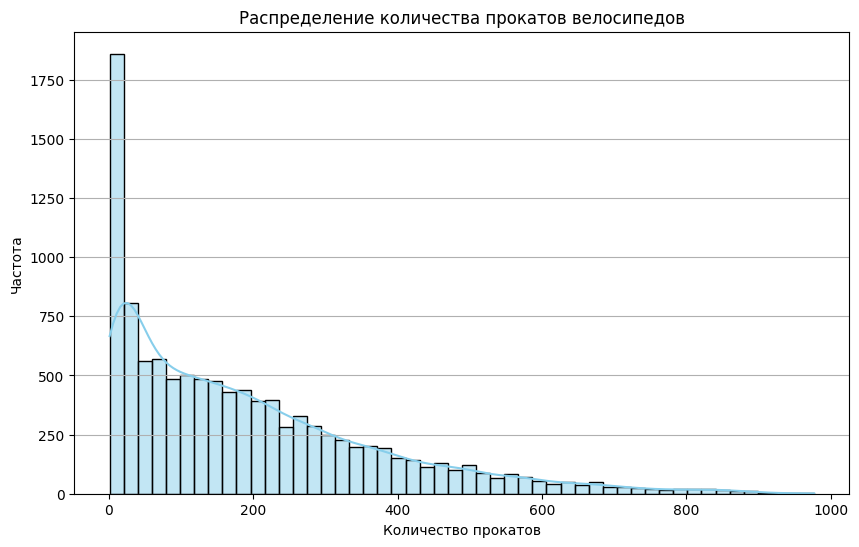

In [53]:
plt.figure(figsize=(10, 6))
sns.histplot(df_rents['count'], bins=50, kde=True, color='skyblue')
plt.title('Распределение количества прокатов велосипедов')
plt.xlabel('Количество прокатов')
plt.ylabel('Частота')
plt.grid(axis='y')
plt.show()


**Ответьте на вопрос:** основываясь на графике, сколько приблизительно в среднем прокатов бывает в день?

Ответ: 250

### 6. Совместное распределение признаков

Постройте график совместного распределения признаков температура и ощущение температуры.



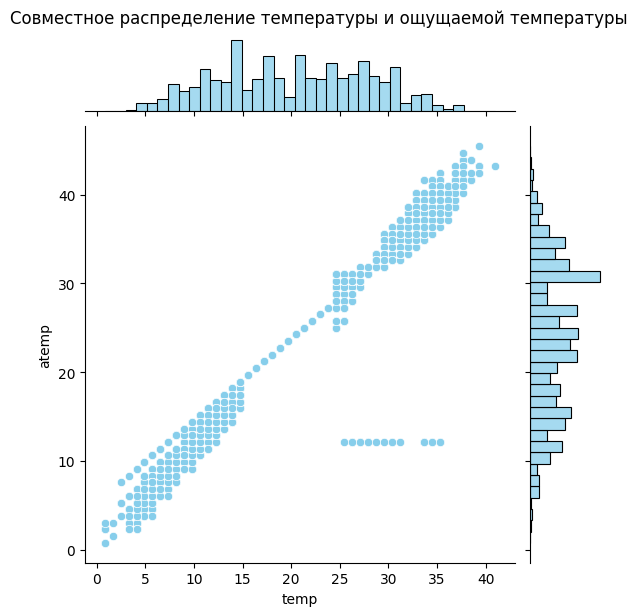

In [54]:
sns.jointplot(x='temp', y='atemp', data=df_rents, kind='scatter', color='skyblue')
plt.suptitle('Совместное распределение температуры и ощущаемой температуры', y=1.02)
plt.show()

**Ответьте на вопрос:** вас в этом графике ничего не настораживает? Почему?

Ответ: Не настараживает. Ощущаемая температура почти такая же как и реальная

### 7. Боксплот (ящик с усами)

Постройте график распределения (боксплот) количества прокатов велосипедов по месяцам в зависимости от того рабочий это день или нет.




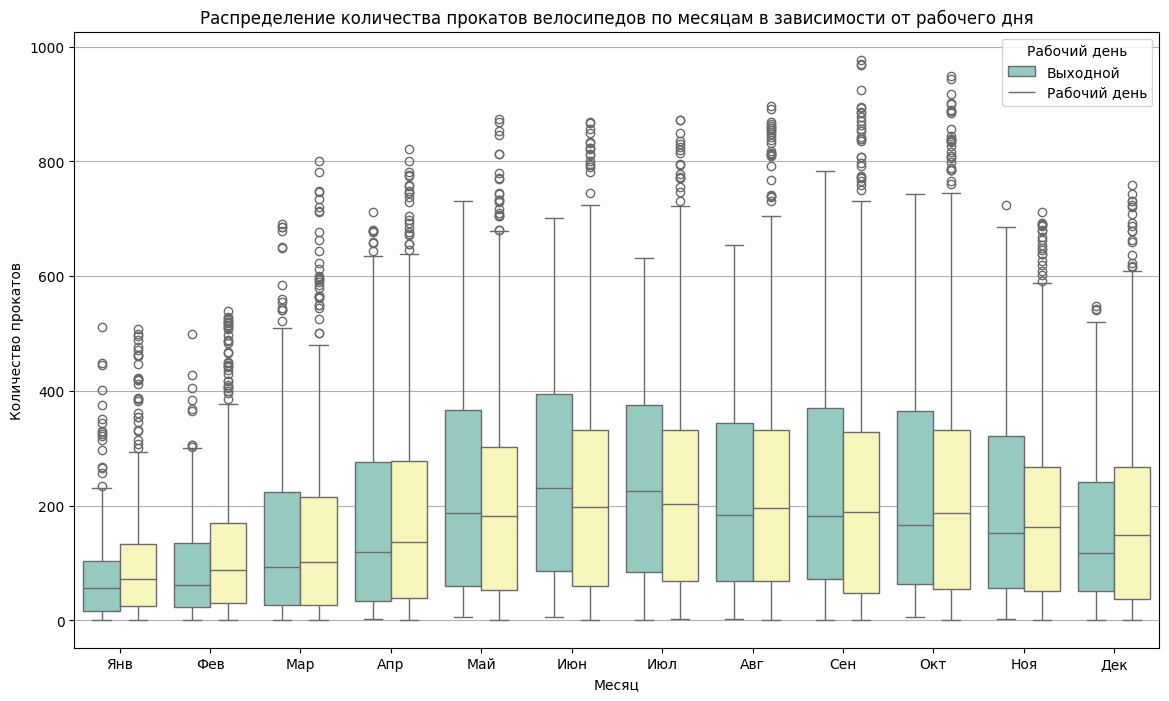

In [55]:
df_rents['month'] = df_rents['datetime'].dt.month

plt.figure(figsize=(14, 8))
sns.boxplot(x='month', y='count', hue='workingday', data=df_rents, palette='Set3')
plt.title('Распределение количества прокатов велосипедов по месяцам в зависимости от рабочего дня')
plt.xlabel('Месяц')
plt.ylabel('Количество прокатов')
plt.xticks(ticks=range(12), labels=['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек'])
plt.legend(title='Рабочий день', labels=['Выходной', 'Рабочий день'])
plt.grid(axis='y')
plt.show()

**Ответьте на вопрос:** почему в некоторых месяцах чаще берут велосипеды в будний день, а в некоторые - в выходной.

Ответ: В теплый месяц, можно и на работу на велосипеде прокатиться

## Комплексное задание №3. Визуальный анализ данных. Часть 2

In [60]:
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
# colab = True # если работаете на своём компьютере, в локальной среде, поставьте False
# if colab:
#     from google.colab import drive
#     drive.mount('/content/drive')

В этом задании Вам предлагается провести визуальный анализ датасета результатов экзаменов студентов  https://www.kaggle.com/spscientist/students-performance-in-exams.

Исходные данные загрузите самостоятельно!

In [62]:
# if colab:
#     df = pd.read_csv('/content/drive/My Drive/Data/StudentsPerformance.csv')
# else:
#     df = pd.read_csv("../../data/StudentsPerformance.csv")

df_stud = pd.read_csv('StudentsPerformance.csv')

df_stud.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### Ход задания:

#### 1. Постройте 3 графика, показывающих распределение результатов экзаменов (каждый график на предмет).


Графики должны быть в одном ряду и у них должен быть общий заголовок "Результаты экзаменов".

Для результатов каждого экзамена посчитайте медианные значения.


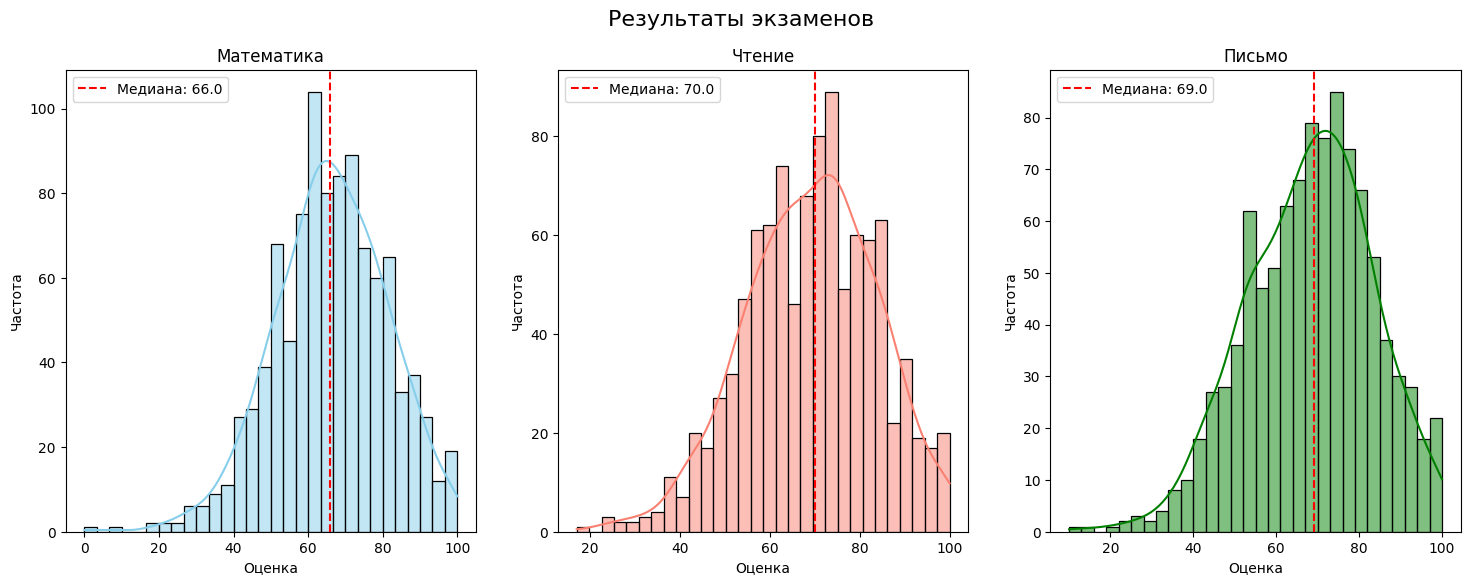

In [63]:
median_math = df_stud['math score'].median()
median_reading = df_stud['reading score'].median()
median_writing = df_stud['writing score'].median()

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# График для математики
sns.histplot(df_stud['math score'], bins=30, kde=True, color='skyblue', ax=axes[0])
axes[0].axvline(median_math, color='red', linestyle='--', label=f'Медиана: {median_math}')
axes[0].set_title('Математика')
axes[0].set_xlabel('Оценка')
axes[0].set_ylabel('Частота')
axes[0].legend()

# График для чтения
sns.histplot(df_stud['reading score'], bins=30, kde=True, color='salmon', ax=axes[1])
axes[1].axvline(median_reading, color='red', linestyle='--', label=f'Медиана: {median_reading}')
axes[1].set_title('Чтение')
axes[1].set_xlabel('Оценка')
axes[1].set_ylabel('Частота')
axes[1].legend()

# График для письма
sns.histplot(df_stud['writing score'], bins=30, kde=True, color='green', ax=axes[2])
axes[2].axvline(median_writing, color='red', linestyle='--', label=f'Медиана: {median_writing}')
axes[2].set_title('Письмо')
axes[2].set_xlabel('Оценка')
axes[2].set_ylabel('Частота')
axes[2].legend()

fig.suptitle('Результаты экзаменов', fontsize=16)

plt.show()

#### 2. Образование родителей
Какие уровни образование есть в столбце *'parental level of education'* и сколько строк в датафрейме соответствует каждому уровню?

Постройте график и ответьте на вопрос ниже

Отличаются ли баллы по математике у детей с разным образованием родителей?
Постройте график, где по оси Х находятся уровни образования родителей, а по У - баллы по математике.


parental level of education
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: count, dtype: int64


<ipython-input-64-235bfc4e945b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='parental level of education', y='math score', data=df_stud, palette='Set3')


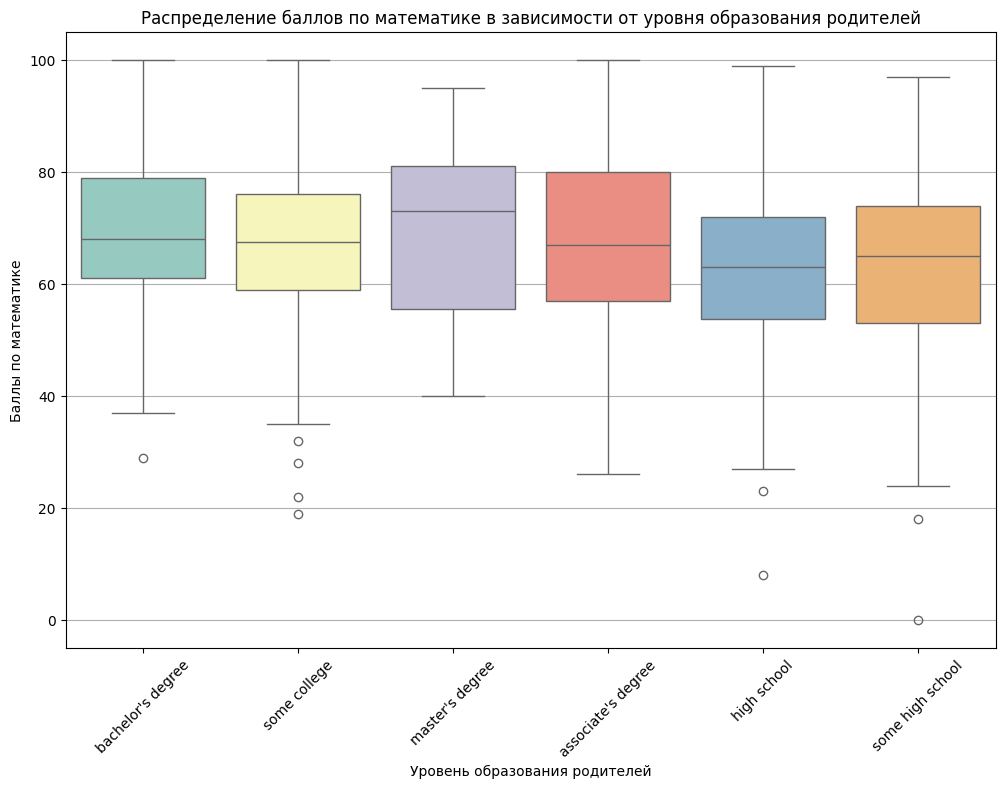

In [64]:
parental_education_counts = df_stud['parental level of education'].value_counts()
print(parental_education_counts)

# Построение графика распределения баллов по математике в зависимости от уровня образования родителей
plt.figure(figsize=(12, 8))
sns.boxplot(x='parental level of education', y='math score', data=df_stud, palette='Set3')
plt.title('Распределение баллов по математике в зависимости от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Баллы по математике')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

#### 3. Выведите число студенток, набравших больше 90 баллов по всем предметам.


In [65]:
high_score_females = df_stud[(df_stud['gender'] == 'female') &
                             (df_stud['math score'] > 90) &
                             (df_stud['reading score'] > 90) &
                             (df_stud['writing score'] > 90)]

num_high_score_females = high_score_females.shape[0]
print(f"Количество студенток, набравших больше 90 баллов по всем предметам: {num_high_score_females}")

Количество студенток, набравших больше 90 баллов по всем предметам: 17


#### 4. Сравните баллы у студентов разных полов. Используя agg() выведите минимальное, максимальное и медианное значение


In [66]:
gender_stats = df_stud.groupby('gender').agg({
    'math score': ['min', 'max', 'median'],
    'reading score': ['min', 'max', 'median'],
    'writing score': ['min', 'max', 'median']
})

gender_stats

math score             reading score             writing score       \
              min  max median           min  max median           min  max   
gender                                                                       
female          0  100   65.0            17  100   73.0            10  100   
male           27  100   69.0            23  100   66.0            15  100   

               
       median  
gender         
female   74.0  
male     64.0

#### 5. Выясните, влияет ли обед и подготовка к тесту на средний балл студентов разного пола
###### (подсказка: используете  [pd.agg()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.agg.html))

In [67]:
grouped_data = df_stud.groupby(['gender', 'lunch', 'test preparation course']).agg({
    'math score': 'mean',
    'reading score': 'mean',
    'writing score': 'mean'
}).reset_index()

print(grouped_data)

   gender         lunch test preparation course  math score  reading score  \
0  female  free/reduced               completed   60.785714      73.428571   
1  female  free/reduced                    none   52.890756      63.831933   
2  female      standard               completed   71.131579      79.798246   
3  female      standard                    none   66.530233      73.386047   
4    male  free/reduced               completed   65.639344      65.786885   
5    male  free/reduced                    none   60.609524      59.076190   
6    male      standard               completed   75.955752      72.601770   
7    male      standard                    none   69.832512      64.719212   

   writing score  
0      74.371429  
1      61.781513  
2      81.508772  
3      72.967442  
4      65.737705  
5      55.285714  
6      71.982301  
7      61.906404  


#### 6. Постройте график, показывающий зависимость уровня образования родителей от их расы

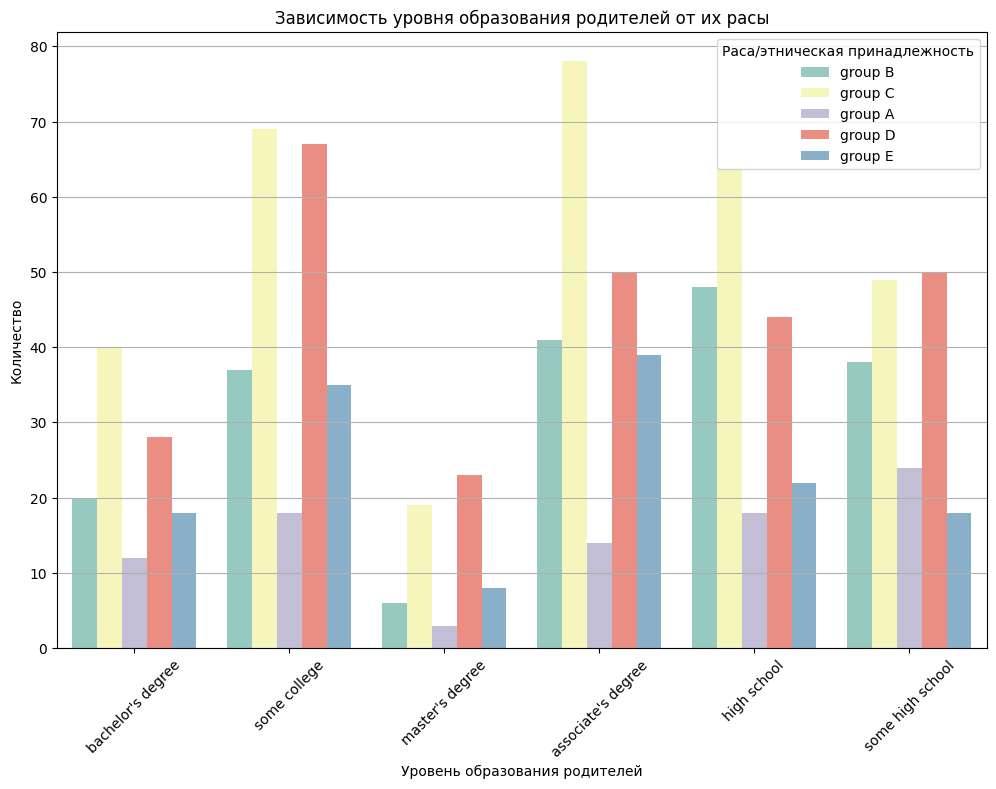

In [68]:
plt.figure(figsize=(12, 8))
sns.countplot(x='parental level of education', hue='race/ethnicity', data=df_stud, palette='Set3')
plt.title('Зависимость уровня образования родителей от их расы')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.xticks(rotation=45)
plt.legend(title='Раса/этническая принадлежность')
plt.grid(axis='y')
plt.show()

#### 7. Постройте график, показывающий зависимость прохождения подготовительного теста от уровня образования родителей.


Кто чаще ходит на курсы: дети, родители которых закончили только старшую школу, или дети, чьи родители получили степень бакалавра\магистра?

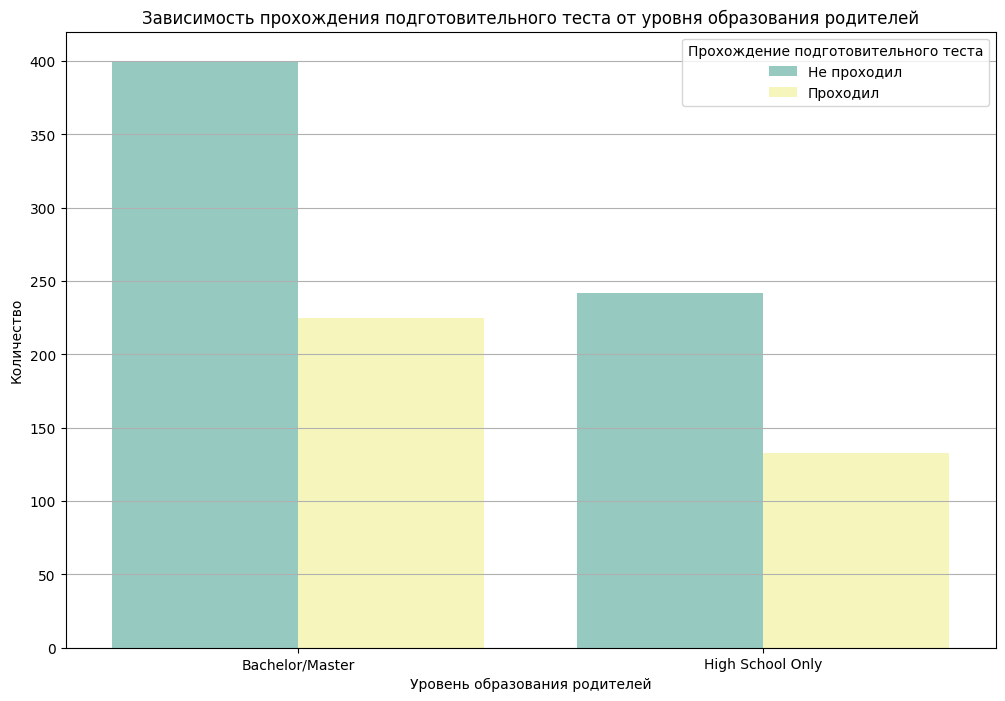

In [69]:
df_stud['parental_education_group'] = df_stud['parental level of education'].apply(
    lambda x: 'High School Only' if x in ['some high school', 'high school'] else 'Bachelor/Master'
)

plt.figure(figsize=(12, 8))
sns.countplot(x='parental_education_group', hue='test preparation course', data=df_stud, palette='Set3')
plt.title('Зависимость прохождения подготовительного теста от уровня образования родителей')
plt.xlabel('Уровень образования родителей')
plt.ylabel('Количество')
plt.legend(title='Прохождение подготовительного теста', labels=['Не проходил', 'Проходил'])
plt.grid(axis='y')
plt.show()

#### 8. Постройте plot.pie, показывающий, сколько людей сдали\не сдали экзамен по математике.

Сдавшим считается человек, набравший 40 баллов.

###### Подсказка: создайте столбец в датафрейме, который содержит результат сдачи (сдал или не сдал)

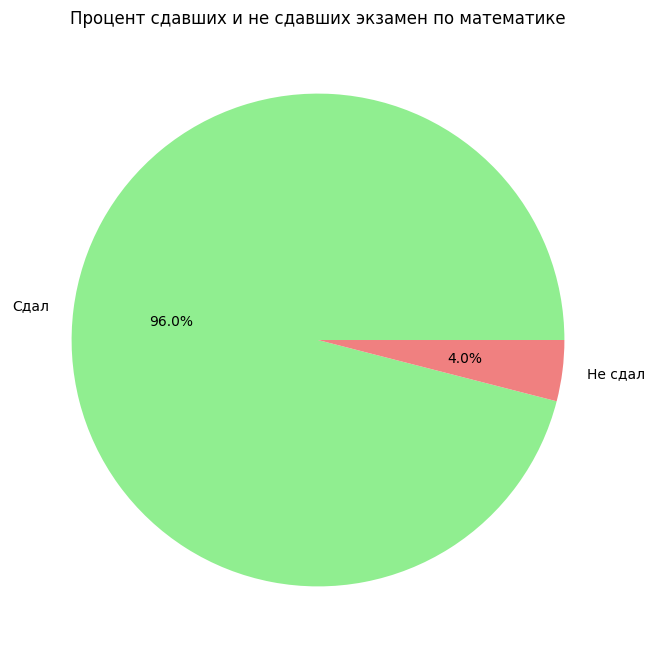

In [70]:
df_stud['math_pass_status'] = df_stud['math score'].apply(lambda x: 'Сдал' if x >= 40 else 'Не сдал')

pass_counts = df_stud['math_pass_status'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(pass_counts, labels=pass_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
plt.title('Процент сдавших и не сдавших экзамен по математике')
plt.show()

#### 9. Постройте plot.pie, показывающий распределение студентов по оценкам

Оценки студентов выставляются по шкале:<br>
0  - 40 marks : grade E<br>
41 - 60 marks : grade D<br>
60 - 70 marks : grade C<br>
70 - 80 marks : grade B<br>
80 - 90 marks : grade A<br>
90 - 100 marks : grade O<br>

Для этого посчитайте сумму результатов за 3 экзамена и найдите среднее. Оценка выставляется по среднему значению. Если студент не сдал математику(даже если средний балл выше 40), он получает Е

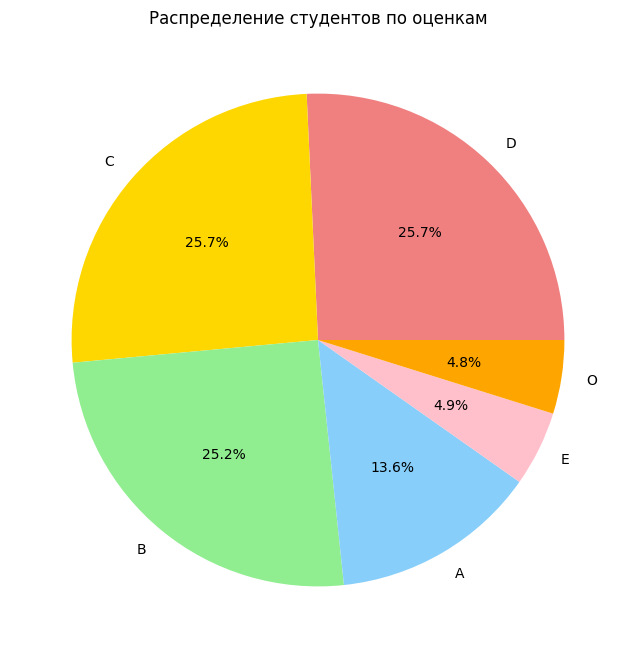

In [71]:
df_stud['average_score'] = df_stud[['math score', 'reading score', 'writing score']].mean(axis=1)

def assign_grade(row):
    if row['math score'] < 40:
        return 'E'
    elif 0 <= row['average_score'] <= 40:
        return 'E'
    elif 41 <= row['average_score'] <= 60:
        return 'D'
    elif 61 <= row['average_score'] <= 70:
        return 'C'
    elif 71 <= row['average_score'] <= 80:
        return 'B'
    elif 81 <= row['average_score'] <= 90:
        return 'A'
    elif 91 <= row['average_score'] <= 100:
        return 'O'

df_stud['grade'] = df_stud.apply(assign_grade, axis=1)

grade_counts = df_stud['grade'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(grade_counts, labels=grade_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'gold', 'lightgreen', 'lightskyblue', 'pink', 'orange'])
plt.title('Распределение студентов по оценкам')
plt.show()

#### 10. Постройте countplot, показывающий зависимость между итоговой оценкой студентов и его полом. Студенты какого пола получили больше оценок О, А, В

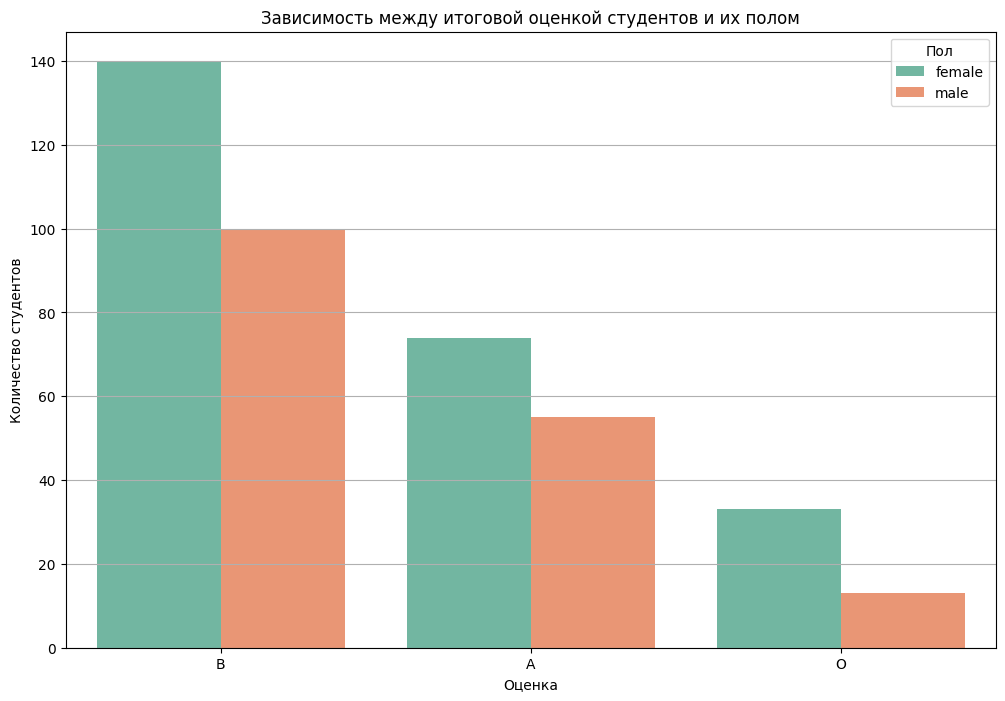

In [72]:
df_stud['average_score'] = df_stud[['math score', 'reading score', 'writing score']].mean(axis=1)

def assign_grade(row):
    if row['math score'] < 40:
        return 'E'
    elif 0 <= row['average_score'] <= 40:
        return 'E'
    elif 41 <= row['average_score'] <= 60:
        return 'D'
    elif 61 <= row['average_score'] <= 70:
        return 'C'
    elif 71 <= row['average_score'] <= 80:
        return 'B'
    elif 81 <= row['average_score'] <= 90:
        return 'A'
    elif 91 <= row['average_score'] <= 100:
        return 'O'

df_stud['grade'] = df_stud.apply(assign_grade, axis=1)

df_filtered = df_stud[df_stud['grade'].isin(['O', 'A', 'B'])]

plt.figure(figsize=(12, 8))
sns.countplot(x='grade', hue='gender', data=df_filtered, palette='Set2')
plt.title('Зависимость между итоговой оценкой студентов и их полом')
plt.xlabel('Оценка')
plt.ylabel('Количество студентов')
plt.legend(title='Пол')
plt.grid(axis='y')
plt.show()